In [8]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [9]:
#File path
df = pd.read_csv("DATA/FTCD.csv")
df2 = pd.read_csv("DATA/FTCD2.csv")


In [10]:
#Merge two datasets
merged_df = pd.concat([df,df2], ignore_index=True)


In [11]:
#Display the table
merged_df


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
1496583,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [12]:
# Count the occurrences of each product category
category_counts = merged_df['Product Category'].value_counts()
category_counts


Product Category
electronics        300042
health & beauty    300038
clothing           299018
toys & games       298996
home & garden      298492
Name: count, dtype: int64

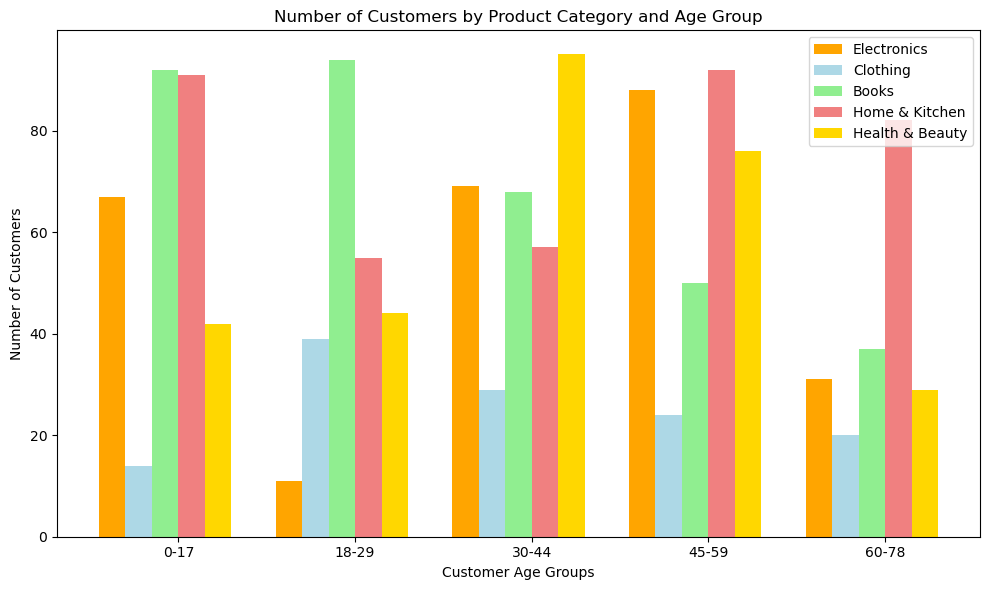

In [13]:
# Sample data
product_categories = ['Electronics', 'Clothing', 'Books', 'Home & Kitchen', 'Health & Beauty']
ages = np.random.randint(10, 80, size=500)

# Generate random ages for demonstration
customer_age_groups = ['Under 18', '18-30', '31-45', '46-60', 'Over 60']

# Compute histogram bin edges based on age groups
bins = np.histogram_bin_edges(ages, bins=[0, 18, 30, 45, 60, np.max(ages)])

# Create age group labels
age_group_labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Generate random data for demonstration
data = np.random.randint(10, 100, size=(len(product_categories), len(bins)-1))

# Define custom colors
colors = ['orange', 'lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
index = np.arange(len(bins)-1)

for i, category in enumerate(product_categories):
    ax.bar(index + i * bar_width, data[i], bar_width, label=category, color=colors[i])

ax.set_xlabel('Customer Age Groups')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Product Category and Age Group')
ax.set_xticks(index + (bar_width * len(product_categories)) / 2)
ax.set_xticklabels(age_group_labels)
ax.legend()

plt.tight_layout()
plt.show()
